# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [56]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import r2_score

import seaborn as sns
from sklearn.preprocessing import scale
# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [3]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [5]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [6]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [28]:
print(boston.target.shape)

(506,)


In [7]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [30]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

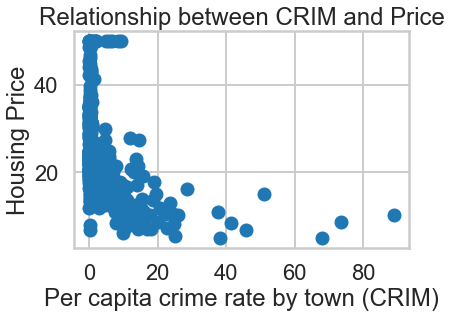

In [31]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [ ]:
# your turn: describe relationship

**As the per capita crime rate per town (CRIM) increases, the housing prices tend to go down. The feature variable (CRIM) is negatively correlated with the target variable, PRICE. If we were to plot a linear regression plot, we would have a line with a negative slope. Let us take a look at this below.**

Text(0.5, 1.0, 'Regression plot describing the relationship between CRIM and price')

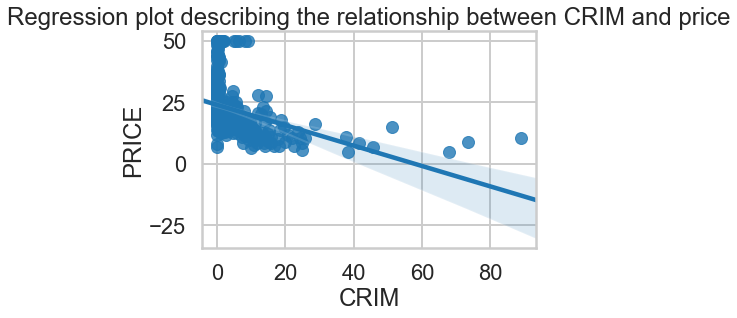

In [62]:
sns.regplot(x = 'CRIM', y = 'PRICE', data = bos)
plt.title('Regression plot describing the relationship between CRIM and price')

Text(0.5, 1.0, 'Relationship between RM and Price')

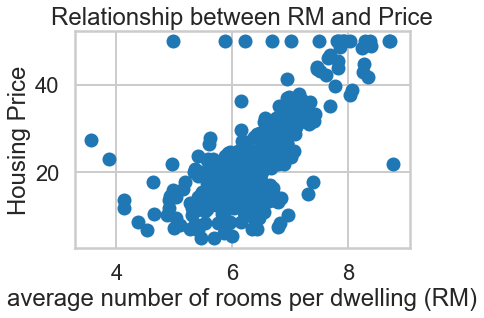

In [32]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

**From the plot above, we see a significant increase in housing prices with an increase in RM. The feature variable, RM has a positive correlation with the target variable,PRICE.**

Text(0.5, 1.0, 'Relationship between RM and Price')

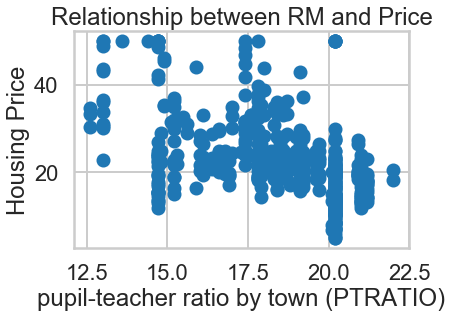

In [71]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

**From the above plot, we can see a negative relation between the house price and the PTRATIO. That is, an increase in PTRATIO is associated with a decrease in Housing prices. By just eyeballing the plot above,it looks like weak relationship. Let us try and confirm this intuition by calculating the correlation coeff between these two variables followed by a regression plot**

In [72]:
np.corrcoef(bos.PTRATIO, bos.PRICE)[0, 1]

-0.5077866855375615

**It was indeed a negative correlation and not as weak. Let us now plot the reg plot.**

Text(0.5, 1.0, 'Reg plot of Price vs. PTRATIO')

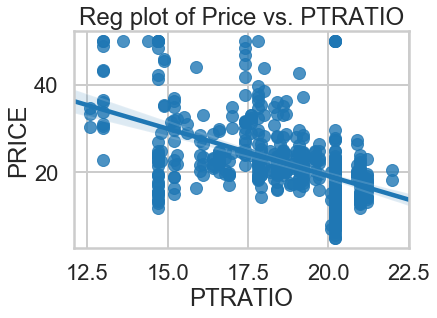

In [75]:
sns.regplot(x = 'PTRATIO', y = 'PRICE', data = bos)
plt.title('Reg plot of Price vs. PTRATIO')

Text(0.5, 1.0, 'Relationship between DIS and Price')

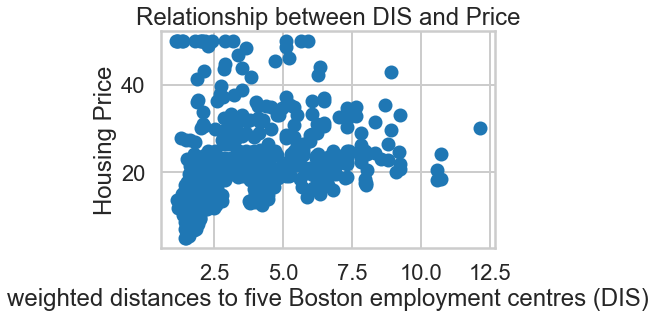

In [35]:
# your turn: create some other scatter plots
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("weighted distances to five Boston employment centres (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")

**From the graph above, there appears to be a positive relationship between DIS and PRICE. An increase in DIS is associated with an increase in PRICE. However, overall correlation could be a weak one because of the high prices for values of DIS between 2.5 and 5. Let us try and confirm this by computing the correlation coefficient.**

In [76]:
np.corrcoef(bos.DIS, bos.PRICE)[0, 1]

0.24992873408590388

**We get a correlation coeff of ~0.25 which indeed isn't a very strong correlation.**

Text(0.5, 1.0, 'Relationship between RAD and Price')

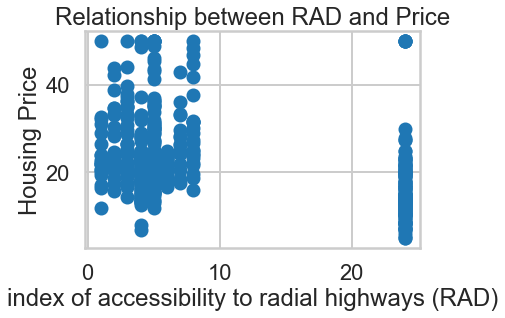

In [78]:
plt.scatter(bos.RAD, bos.PRICE)
plt.xlabel("index of accessibility to radial highways (RAD)")
plt.ylabel("Housing Price")
plt.title("Relationship between RAD and Price")

**From the above plot, there appears to be a negative correlation between the RAD and housing price. However, it looks like a weak correlation from the graph. Let us compute the correlation coefficient to see if it's true.**

In [79]:
np.corrcoef(bos.RAD, bos.PRICE)[0, 1]

-0.38162623063977746

**The above value for correlation coeff doesn't signify a weak relationship.**

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

C:\Users\Aditya\Miniconda2\envs\ipykernel_py3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


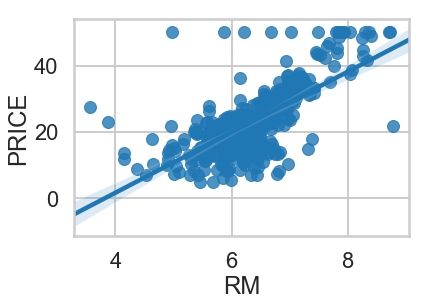

In [37]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

In [ ]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


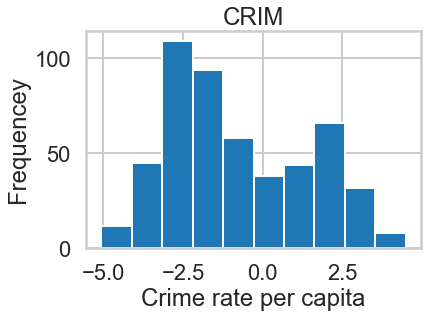

In [38]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

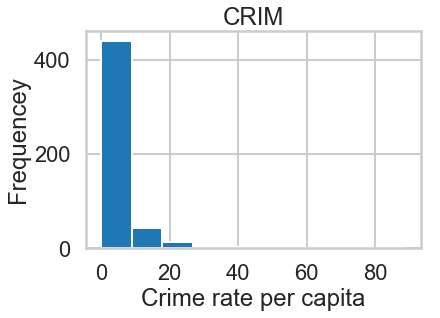

In [39]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

**From the above histogram plot, the distribution seems heavilty skewed to the right. However, by plotting the hitogram of the log valuesfor CRIM, we get a histogram distribution that is pretty spread out. This is one of the downsides of using histogram plots. They sre subject to "binning bias". The histogram plots could look very different for different bin sizes. Also,log scales allow a large range to be displayed without small values being compressed down into bottom of the graph. By rescaling the values using the log scale, we were able to reduce this binning bias to a great extent.**

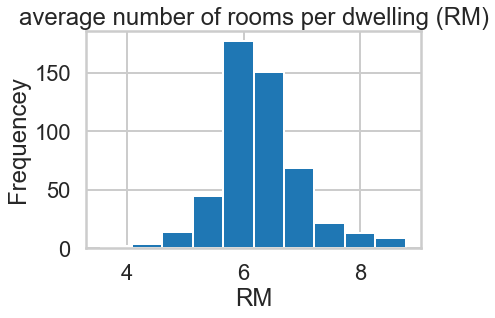

In [42]:
plt.hist(bos.RM)
plt.title("average number of rooms per dwelling (RM)")
plt.xlabel("RM")
plt.ylabel("Frequencey")
plt.show()

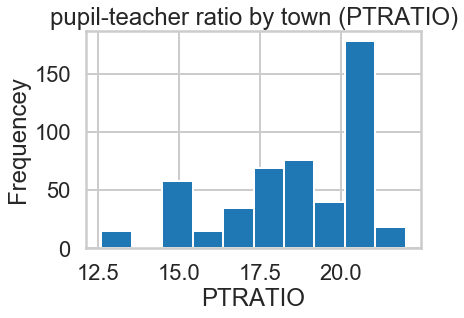

In [45]:
plt.hist(bos.PTRATIO)
plt.title("pupil-teacher ratio by town (PTRATIO)")
plt.xlabel('PTRATIO')
plt.ylabel("Frequencey")
plt.show()

Text(0, 0.5, 'ln(PTRATIO)')

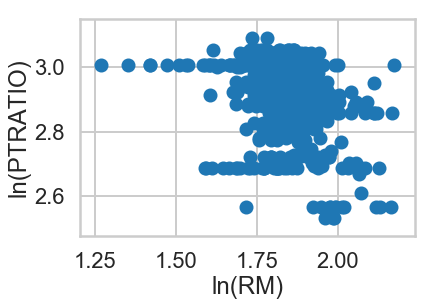

In [103]:
plt.scatter(x = np.log(bos.RM), y = np.log(bos.PTRATIO))
plt.xlabel('ln(RM)')
plt.ylabel('ln(PTRATIO)')

**Plotting a scatter plot for PTRATION vs RM, we observe that that there is a negative relationship between these two predictor variables. Let us compute the correlation coefficient to confirm this.**

In [89]:
np.corrcoef(bos.RM, bos.PTRATIO)[0, 1]

-0.35550149455908536

**Indeed, our correlation coefficient confirms the significant negative correlation.**

Text(0.5, 1.0, 'Regression plot of PTRATION vs. RM')

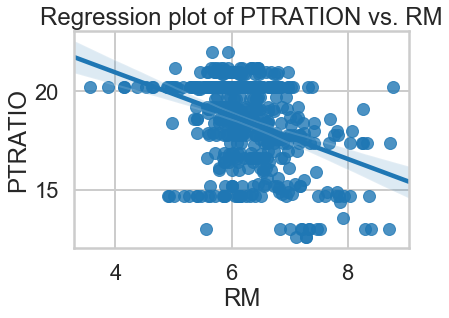

In [107]:
sns.regplot(x = 'RM', y = 'PTRATIO', data = bos)
plt.title('Regression plot of PTRATION vs. RM')

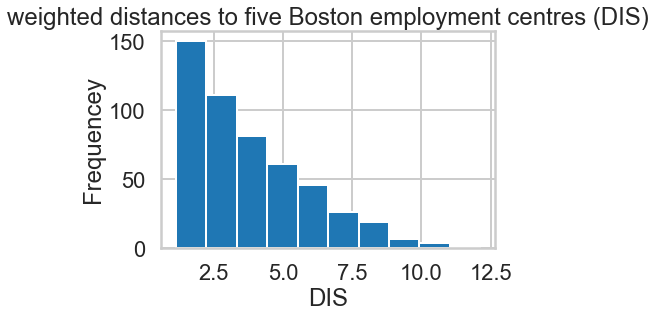

In [48]:
plt.hist(bos.DIS)
plt.title("weighted distances to five Boston employment centres (DIS)")
plt.xlabel('DIS')
plt.ylabel("Frequencey")
plt.show()

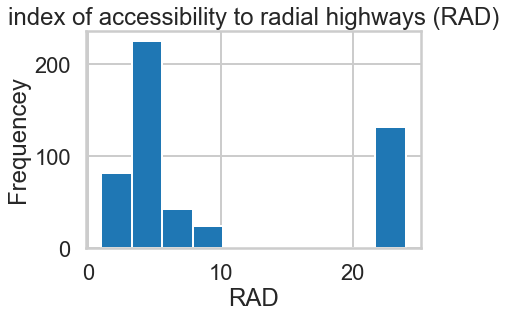

In [51]:
plt.hist(bos.RAD)
plt.title("index of accessibility to radial highways (RAD)")
plt.xlabel('RAD')
plt.ylabel("Frequencey")
plt.show()

Text(0, 0.5, 'ln(DIS)')

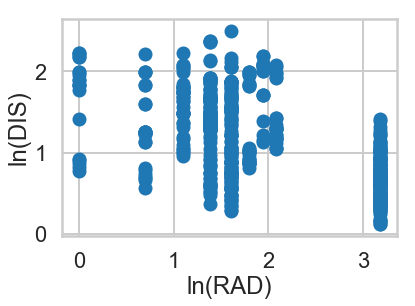

In [100]:
plt.scatter(x = np.log(bos.RAD), y = np.log(bos.DIS))
plt.xlabel('ln(RAD)')
plt.ylabel('ln(DIS)')

**We see a negative correlation between the RAD and DIS. Let us compute the correlatio coefficient to confirm this.**

In [94]:
np.corrcoef(bos.RAD, bos.DIS)[0,1]

-0.49458792967207527

**This relationship can be better visualized using the regresion plot below.**

Text(0.5, 1.0, 'Regression plot of DIS vs. RAD')

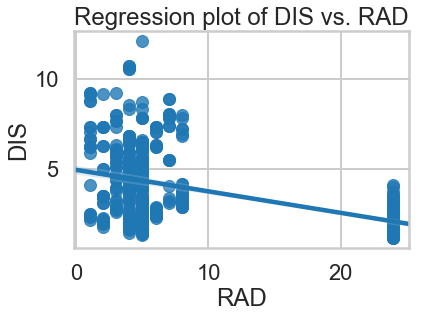

In [105]:
sns.regplot(x = 'RAD', y = 'DIS', data = bos)
plt.title('Regression plot of DIS vs. RAD')

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [8]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.49e-74
Time:                        14:18:45   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

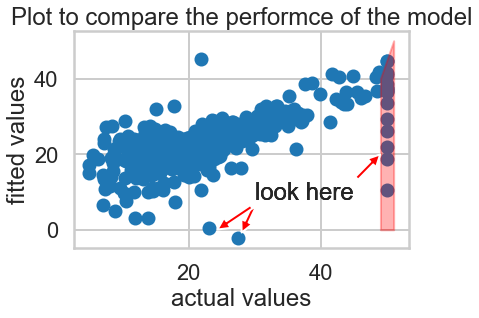

In [73]:
# your turn
plt.scatter(x = bos.PRICE, y = m.fittedvalues)
plt.ylabel('fitted values')
plt.xlabel('actual values')
plt.title('Plot to compare the performce of the model')
plt.annotate('look here', xy= (28, -0.8), xytext=(30, 8),arrowprops=dict(facecolor='red', shrink=0.01))
plt.annotate('look here', xy= (24.3, 0), xytext=(30, 8),arrowprops=dict(facecolor='red', shrink=0.01))
plt.annotate('look here', xy= (49, 20), xytext=(30, 8),arrowprops=dict(facecolor='red', shrink=0.01))
plt.fill_between([49,51], [40, 50], alpha=0.3, color = 'red')

**While the regression model performs well for the most part, there are some strange data points. Please look at the 2 of the data points (refer to the red arrows), one fitted at 0 and the other fitted below 0, which is incorrect.**

**Now, refer to the shaded area (in light red). There are a host of wrong predictions where the actual value is ~50 but the fitted values are ~40 or below. Some are as low as ~15 when the actual value is close to 50. Hence, the model performed badly for higher values.**

### Fitting Linear Regression using `sklearn`


In [117]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [ ]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [118]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [12]:
# your turn
lm.__init__(fit_intercept=False)
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

**The above code is to be used to fit a regression line that passes through the origin. After referring the link in the blue box of questions above, one must admit that it makes intuituve sense. A student who scored 0 in reading cannot score a 24 in writing. That is, in most cases y must be equal to 0 when x=0. However, when a regression doesn't pass through the origin, this just means that y is non-linear. While we may get a high value for R-square, this could lead to over fitting. This model may not perform very well on unseen data. On the contrary, the linear regression with an intercept model may be a better estimator for unseen data. Hence, regression through the origin is not very practical despite it making the case for being factual.** 

**Another way to achieve better better results would be through feature scaling.The values are normalized in the data preprocessing step before fitting the model.**

**By observing the distribution plot above, we can see that the dependent variable, PRICE isn't normally distributed and is slightly skewed to the right. One of the assumptions of the linear model is that Y is normally distributed. But, there is an exception. As the sample size increases, the normality of residuals becomes less important. Repeated sampling from considerably large samples would mean that the distribution of residuals would approximately be normal. These rules are in accordance with the Central Limit Theorem.**

**Since the normality of Y is dependent on the residuals being normal and i.i.d, it isn't necessary for Y to be normal. As long as the rules of the Central Limit Theorem are followed, the residuals will be normally distributed and Y would also be approximately normally distributed. As long as we have large sample size, repeated sampling would ensure a normal or approximately normal distribution.**

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [16]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [143]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [144]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [43]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

In [119]:
y_pred = lm.predict(X)

(array([ 1.,  0.,  0.,  2.,  2.,  2.,  7.,  7.,  7., 12., 18., 26., 27.,
        44., 45., 49., 44., 43., 30., 23., 23., 23., 19., 16., 13.,  9.,
         3.,  6.,  2.,  3.]),
 array([-4.28131071, -2.64949757, -1.01768444,  0.6141287 ,  2.24594184,
         3.87775497,  5.50956811,  7.14138125,  8.77319438, 10.40500752,
        12.03682066, 13.66863379, 15.30044693, 16.93226007, 18.5640732 ,
        20.19588634, 21.82769948, 23.45951261, 25.09132575, 26.72313889,
        28.35495202, 29.98676516, 31.61857829, 33.25039143, 34.88220457,
        36.5140177 , 38.14583084, 39.77764398, 41.40945711, 43.04127025,
        44.67308339]),
 <a list of 30 Patch objects>)

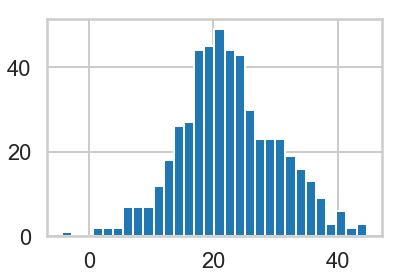

In [18]:
# your turn
plt.hist(y_pred, bins = 30)

Text(0.5, 1.0, 'Distribution of the predicted prices')

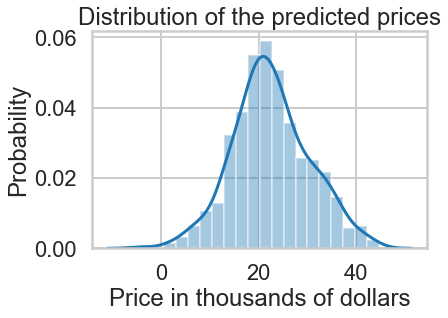

In [53]:
sns.distplot(y_pred)
plt.xlabel('Price in thousands of dollars')
plt.ylabel('Probability')
plt.title('Distribution of the predicted prices')

**From the above graphs, we see that the distribution of the predicted prices is approximately normal with the mean centered around ~21,000. While the distribution is slightly skewed to the right, it is approximately normal as we would expect according to the rules of the CLT. To determine the outliers, let us observe the box plot below.**

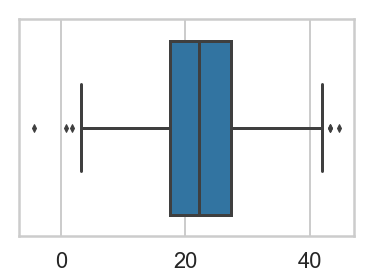

In [19]:
sns.boxplot(y_pred)

**The outliers above 40 do not any special "handling".These data points just happen to be very far away from the mean/median. However, there is one data point below 0 and 2 others close to 0. Since it is impossible for the price of a house to be negative, this is an erroneous data point. The other 2 data points that are close to 0 are once again because these data points are far away from the mean. Besides, our y-intercept is negative.  Hence, the points below and very close to the origin are wrong and must be considered as incorrect observations.**

**To avoid the negative values, we could try fitting the regression line through the origin. However, we must still validate this model and see how it performs on unseen data. We must check if it outperforms the original regression model on unseen data. It is because this could lead to overfitting. If it performs equally well, or better or close, we could stick with this model.**

**Before comparing which model is better, we need to perform a stats models test with all the predictor variables.**

**Below, a variable j of type string has been initialized. The for loop is used to capture all the column names seperated by a '+' which is required when using ols.**

In [110]:
j = ''
for i in bos.columns:
    j += i + '+'     

In [111]:
j

'CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT+PRICE+'

**Since price is the dependent variable, we omit it from our string**

In [112]:
j = j[0:57]

In [113]:
j

'CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [114]:
m7 = ols('PRICE ~' +j,bos).fit()

In [115]:
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          6.72e-135
Time:                        16:02:47   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Predicted vs. Actual price (stats)')

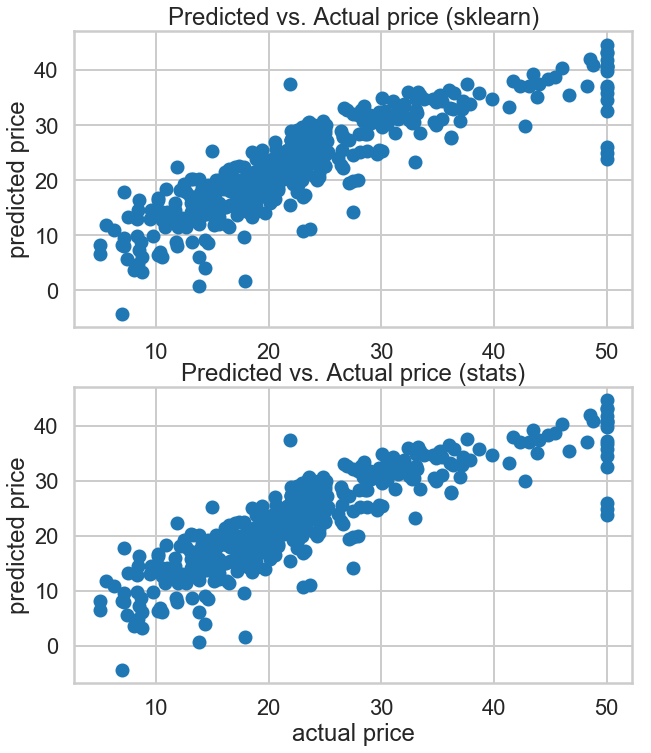

In [128]:
fig, ax = plt.subplots(figsize=(10,12))

plt.subplot(2,1,1)
plt.scatter(y = y_pred, x = bos.PRICE)
plt.ylabel('predicted price')
plt.title('Predicted vs. Actual price (sklearn)')

plt.subplot(2,1,2)
plt.scatter(y = m7.fittedvalues, x = bos.PRICE)
plt.ylabel('predicted price')
plt.xlabel('actual price')
plt.title('Predicted vs. Actual price (stats)')

**Correlation of the actual price vs predicted values using sklearn. We can see that the statsmodels performs poorly in comparison.**

In [59]:
r2_score(bos.PRICE, y_pred)

0.7406426641094095

**The R-squared value of the sklearn model significantly outperforms the statsmodel**

In [122]:
r2_score(bos.PRICE, m7.fittedvalues)

0.7406426641094095

**From the above model comparisons, we can see that there was no difference in performance between stats models and sklearn. Stats model has the advantages in that we can use it to find the t-statistic, z-statistic and the associated p-value of the predictor variables. We can compare two distributions easily with stats models but not with sklearn. Hence, with stats models, we can determine which variables are statstically significant for analysis which is not the case with sklearn. Hence, statsmodels is a preferrable way to analyze our data if we are performing continuous linear regression.**

**The one major disadvantage of using ols with statsmodels is that we need to explicitly specify all our predictor variables which could be tedious. This is, we ,ay have to go with an extra step to define a function to capture all our predictors. With sklearn, we do not need to mention the predictor variables explicitly if are considering all the predictor variables.**


### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [67]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [68]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

2.908056841006738e-26


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [12]:
# your turn
m1 = ols('PRICE ~ PTRATIO',bos).fit()

In [13]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.61e-34
Time:                        14:22:06   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The intercept is 62.345 which is a positive intercept. Hence the line passs through the Y-axis above 0. This means that for a PTRATIO of 0, the housing price will be 62.345 (in thousands). This is as per our linear regression model. The coefficient of PTRATIO is -2.15. Since the coefficient is negative, this means that there is a negative correlation between the feature variable, PTRATIO and the PRICE.**

**The R-squared value is a measly 0.258. This means that our regression line only captured ~25.8% of the variation of the original sample, which is in this case the actual price. An R-squared value close to 1.0 indicates a good fit. This means that we need more variables for a better fit**

**The F-statistic is ~175 and its associated p-value is almost 0. This means that there is indeed a statistically significant distribution in means of the predicted price vs. the actual price. A large p-value indicates that the means of the precited values and the actual prices are close to each other indicating a good fit.**

**The t-statistic for our predictor variable is -13.23 with p-value estimated to be ~0. Once again, this signifies the gap in distributions between the predicted and actual prices thereby signalling the need for a better model.**

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [14]:
# your turn
#X2 = X[['CRIM', 'RM', 'PTRATIO']]
m2 = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()

In [15]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.15e-98
Time:                        14:22:15   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The F-statistic has been calculated to be ~245. Its associated p-value is once again very close to 0 which means that the predicted values and actual values aren't closely related to each other.**

**The R-squared value is approximately ~0.59. This means that our regression line managed to capture 59% of the variation in the actual prices. Hence, our model has improved significantly from before. The additional features considered for our model have helped and we have a better fitting line. However, it is still lower than what we would ideally like and perhaps, we need more variables to better our model.**

**The p-values associated woth each predictor variable indicate the level of statistical significance. Anything less than our pre-determined threshold level (for simplicity's sake, let us assume 0.05) indicate statustucal significance.In this case, all our predictor variables have values ~0 thereby indicating statistical significance.**

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [16]:
m3 = ols('PRICE ~ CRIM + RM + PTRATIO + DIS + AGE + NOX',bos).fit()

In [17]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     152.4
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          2.10e-109
Time:                        14:22:45   Log-Likelihood:                -1576.9
No. Observations:                 506   AIC:                             3168.
Df Residuals:                     499   BIC:                             3197.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6718      4.983      4.550      0.000      12.882      32.462
CRIM          -0.1513      0.032     -4.674      0.000      -0.215      -0.088
RM             6.6818      0.387     17.245      0.000       5.921       7.443
PTRATIO       -1.1115      0.127     -8.778      0.000      -1.360      -0.863
DIS           -1.3312      0.203     -6.572      0.000      -1.729      -0.933
AGE           -0.0509      0.014     -3.578      0.000      -0.079      -0.023
NOX          -22.5878      3.713     -6.083      0.000     -29.884     -15.292
==============================================================================
Omnibus:                      290.546   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.090
Skew:                           2.297   Prob(JB):                         0.00
Kurtosis:                      14.410   Cond. No.                     1.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The F-statistic is 152.4 and its associated p-value is close to 0 which implies that the predicted values and actual values are not equal or closely related distributions.**

**AIC estimates the relative information lost by a given model: the less information a model loses, the higher the quality of that model. We got an AIC of 3168 (for our model with more predictors) as opposed to 3232 in our earlier model.**

**When comparing AIC values between different model, we would choose the model with lower AIC as this model would have suffered relateively lower model loss. Hence, we go with the latter model i.e the model with greater number of predictors in this case.**

**While our model did improve with the addition of DIS and AGE predictor variables, it isn't a reasonable enough improvement from our previous model. Our adjusted R-squared value is around ~0.64 and the value of the F-statistic is 152.4. While this is a lower value, thr associated p-value is still close to 0, signifying that there is a difference between the predicted and actual prices.**


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

Text(0.5, 1.0, 'Fitted values vs. residuals')

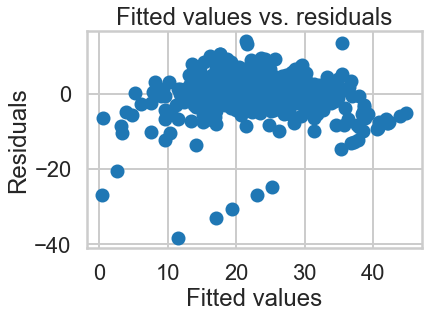

In [18]:
plt.scatter(x = m3.fittedvalues, y = m3.fittedvalues - bos.PRICE)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. residuals')

**For a perfect regression line, all the fitted values will have a 0 residual. Since this is practically impossible to achieve, we would expect the residuals to be centered around 0.**

**We see that the points indeed bounce randomly above and below 0. This confirms that our model, although not perfectly linear, is a reasonable linear model. There are, however a few outliers.**

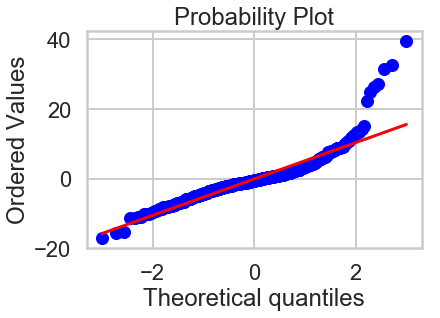

In [114]:
from scipy import stats
stats.probplot(bos.PRICE - m3.fittedvalues, dist = 'norm', fit = True, plot = plt)
plt.show()

**The qunatile plot of residuals helps us understand how "normal" the distribution of residuals is. From the plot above, we see that the model follows a normal distribution but is slightly skewed to the right. Let us try to observe this with a distribution plot below.**

Text(0.5, 1.0, 'Distribution of residuals')

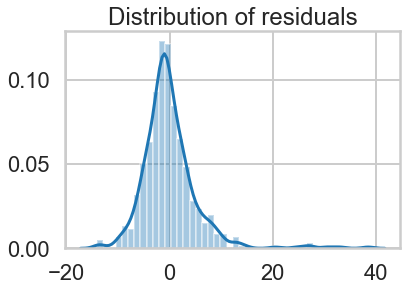

In [26]:
sns.distplot(bos.PRICE - m3.fittedvalues)
plt.title('Distribution of residuals')


**From the plot above, we observe that the distribution is indeed slightly skewed to the right but for the most part, looks "normal". Also, the mean of the distribution is roughly centered around 0 which is what we would expect.**

**The fitted vs. residual plot tells us how good our model is. If the data points randomly bounce up and below 0 i.e the distribution in centered around 0, we can assume that we have a reasonably good model. This also confirms that we have a reasonable linear model.**

**On the other hand, quantile plots help us determine the normality of the distribution of residuals. If the shape of the distribution is "normal" enough with the mean centered around 0, we can be confident that we have a resonable model.**

Text(0.5, 1.0, 'Box plot of our fitted values')

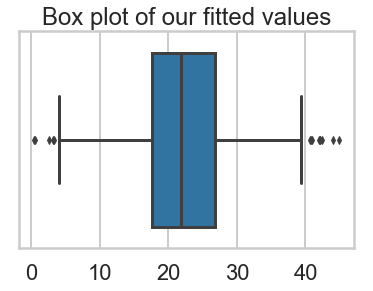

In [28]:
sns.boxplot(m3.fittedvalues)
plt.title('Box plot of our fitted values')

**All the outliers for our fitted model are above 0 which means that we have a positive y-intercept. These data points happen to be far away from the mean and median of the distribution. The outliers below the lower whisker could be due to under prediction i.e the predicted values lie well below the actual value.**

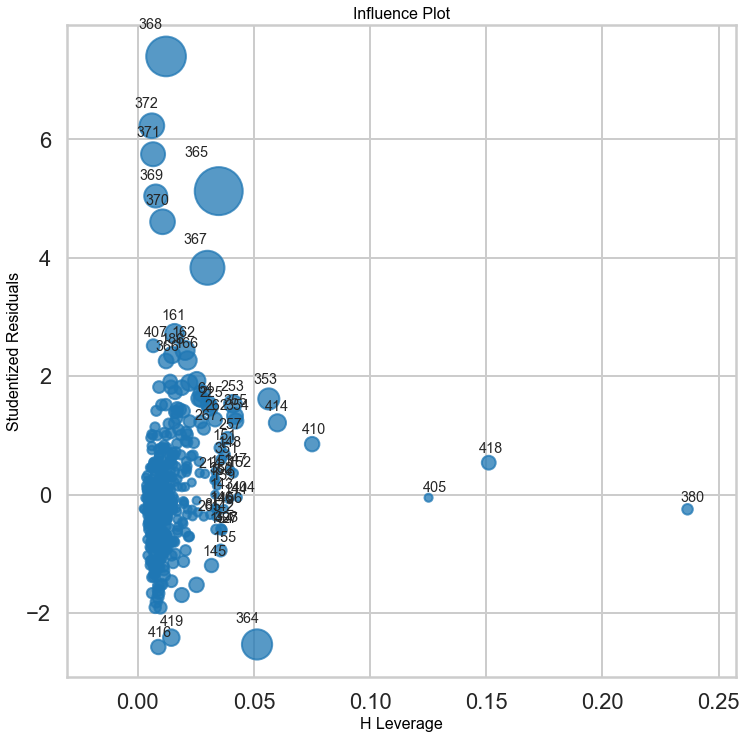

In [29]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(12,12))
fig = sm.graphics.influence_plot(m3, ax=ax, criterion="cooks")

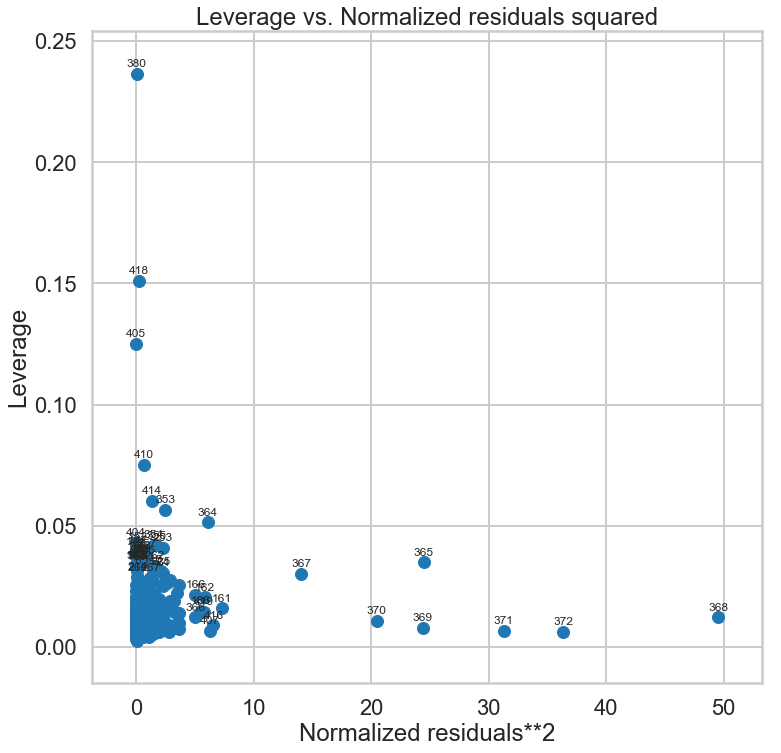

In [30]:
fig, ax = plt.subplots(figsize=(12,12))
fig = sm.graphics.plot_leverage_resid2(m3, ax=ax)


**Defined function below to identify indeces of outliers based on the price.**

In [49]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return df_out.index

In [50]:
a = remove_outlier(bos, 'PRICE')

In [51]:
a

Int64Index([ 97,  98, 157, 161, 162, 163, 166, 179, 180, 182, 186, 190, 195,
            202, 203, 204, 224, 225, 226, 228, 232, 233, 253, 256, 257, 261,
            262, 267, 268, 280, 282, 283, 291, 368, 369, 370, 371, 372, 398,
            405],
           dtype='int64')

**Defined a dataframe, df that will consist of all the indices for the outliers and high leverage points.**

In [52]:
df = bos.drop([97,  98, 157, 161, 162, 163, 166, 179, 180, 182, 186, 190, 195,
            202, 203, 204, 224, 225, 226, 228, 232, 233, 253, 256, 257, 261,
            262, 267, 268, 280, 282, 283, 291, 368, 369, 370, 371, 372, 398,
            405, 418, 405, 380, 410, 414])

**Fitting the model using ols after dropping the outliers and high leverage points.**

In [54]:
m4 = ols('PRICE ~ CRIM + RM + PTRATIO + DIS + AGE + NOX',bos).fit()

In [55]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     152.4
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          2.10e-109
Time:                        15:23:55   Log-Likelihood:                -1576.9
No. Observations:                 506   AIC:                             3168.
Df Residuals:                     499   BIC:                             3197.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6718      4.983      4.550      0.000      12.882      32.462
CRIM          -0.1513      0.032     -4.674      0.000      -0.215      -0.088
RM             6.6818      0.387     17.245      0.000       5.921       7.443
PTRATIO       -1.1115      0.127     -8.778      0.000      -1.360      -0.863
DIS           -1.3312      0.203     -6.572      0.000      -1.729      -0.933
AGE           -0.0509      0.014     -3.578      0.000      -0.079      -0.023
NOX          -22.5878      3.713     -6.083      0.000     -29.884     -15.292
==============================================================================
Omnibus:                      290.546   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.090
Skew:                           2.297   Prob(JB):                         0.00
Kurtosis:                      14.410   Cond. No.                     1.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**From the statistical summary above, it would appear that aren't any significant changes to the R-squared value or the F-statistic. Hence, our outliers and leverage points had little effect on the overall R-squared value and th F-statistic.**

**To achieve a better result, we could use feature scaling which is easier done with sklearn.**